In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import spotipy
from spotipy.oauth2 import SpotifyOAuth

from config import client_ID, client_secret, redirect_url
from methods import get_data


In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id = client_ID,
                                               client_secret= client_secret,
                                               redirect_uri=redirect_url,
                                               scope = "user-follow-read"))

In [4]:
df = get_data(50, sp)

In [5]:
df

,artist_name,popularity,genre,followers
0,Maroon 5,83,[pop],41537191
1,Taylor Swift,100,[pop],97206206
2,Selena Gomez,81,"[pop, post-teen pop]",47235425
3,Avril Lavigne,73,"[canadian pop, candy pop, dance pop, pop]",10525462
4,Queen,84,"[classic rock, glam rock, rock]",48985321
5,Mabel Matiz,68,[turkish pop],3777585
6,Halsey,80,"[electropop, etherpop, indie poptimism, pop]",21232288
7,Nightwish,64,"[fantasy metal, finnish metal, finnish power m...",2095036
8,Three Days Grace,72,"[alternative metal, canadian metal, canadian r...",5902647
9,Metallica,80,"[hard rock, metal, old school thrash, rock, th...",26440936


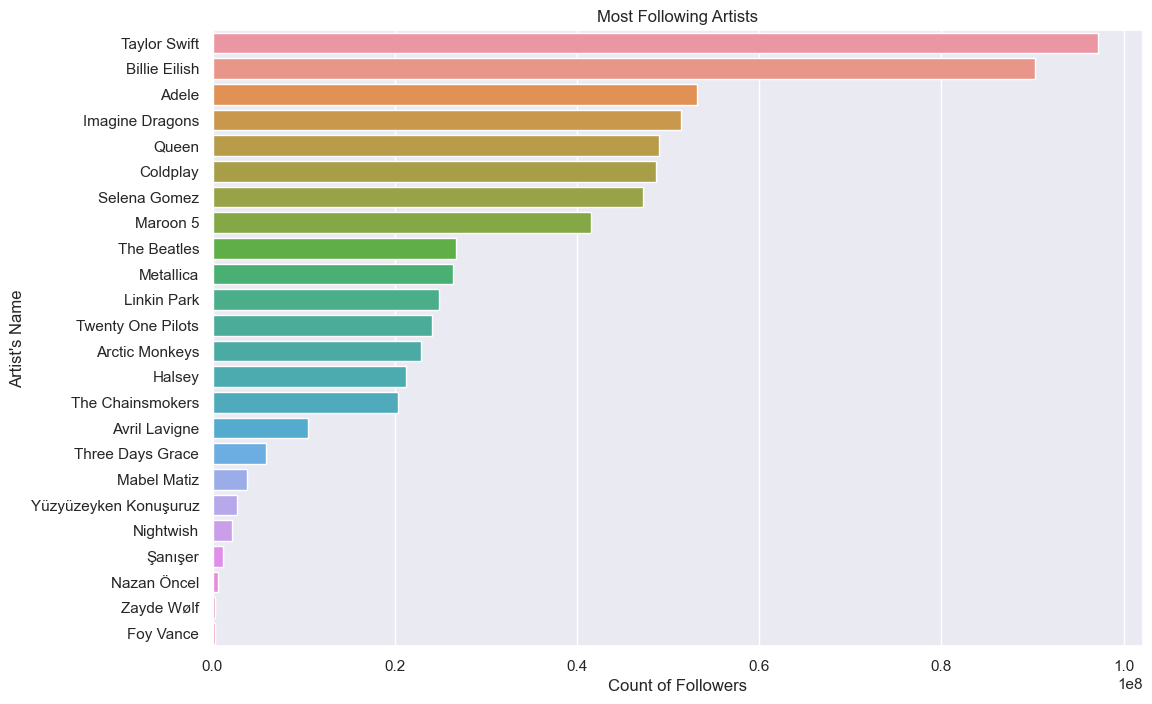

In [30]:
sort_followers = df.groupby("artist_name")["followers"].max().sort_values(ascending=False)
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x = sort_followers.values, y = sort_followers.index, data = df)
plt.xlabel("Count of Followers")
plt.ylabel("Artist's Name")
plt.title("Most Following Artists")
plt.show()

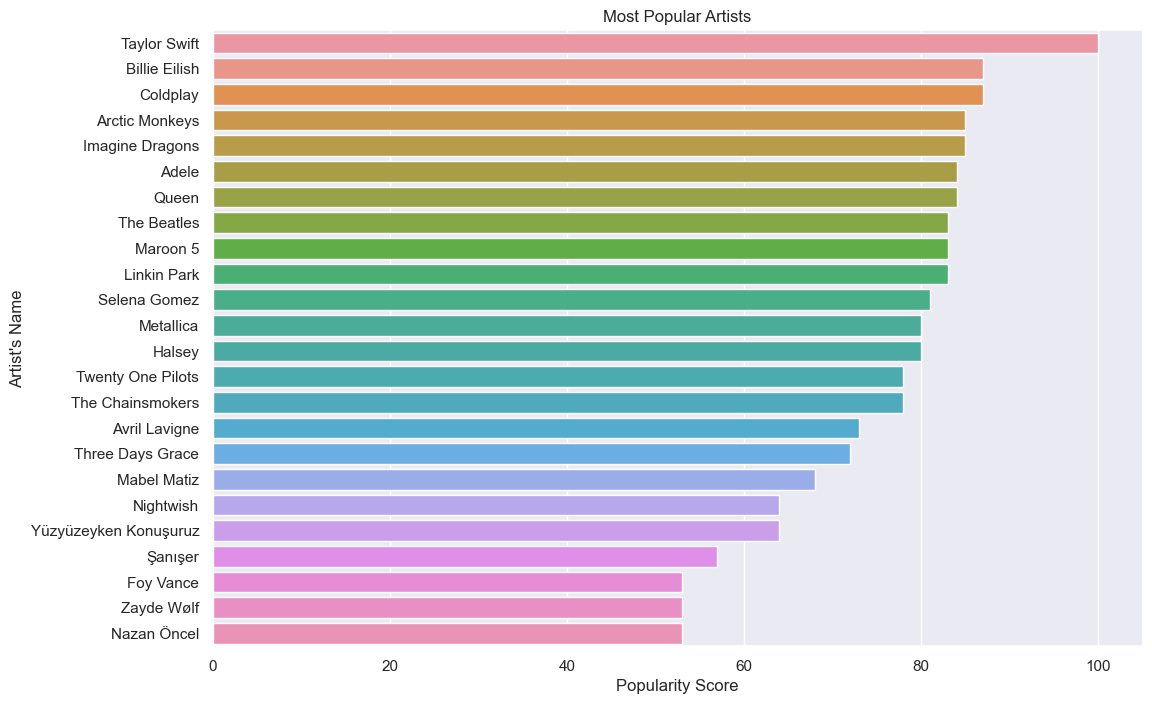

In [35]:
sort_popularity = df.groupby("artist_name")["popularity"].max().sort_values(ascending=False)
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x = sort_popularity.values, y = sort_popularity.index, data = df)
plt.xlabel("Popularity Score")
plt.ylabel("Artist's Name")
plt.title("Most Popular Artists")
plt.show()

In [81]:
df["new_genre"] = df["genre"]

for index, row in df.iterrows():
    if "pop" in row["genre"]:
        df.loc[index, "new_genre"] = "pop"
    elif "rock" in row["genre"]:
        df.loc[index, "new_genre"] = "rock"
    elif "turkish pop" in row["genre"]:
        df.loc[index, "new_genre"] = "turkish pop"
    elif "turkish rock" in row["genre"]:
        df.loc[index, "new_genre"] = "turkish rock"
    elif "indie folk" in row["genre"]:
        df.loc[index, "new_genre"] = "indie"
    elif "fantasy metal" in row["genre"]:
        df.loc[index, "new_genre"] = "metal"
    elif "rebel blues" in row["genre"]:
        df.loc[index, "new_genre"] = "blues"
    elif "turkish hip hop" in row["genre"]:
        df.loc[index, "new_genre"] = "turkish hip hop"

In [82]:
df

,artist_name,popularity,genre,followers,new_genre
0,Maroon 5,83,[pop],41537191,pop
1,Taylor Swift,100,[pop],97206206,pop
2,Selena Gomez,81,"[pop, post-teen pop]",47235425,pop
3,Avril Lavigne,73,"[canadian pop, candy pop, dance pop, pop]",10525462,pop
4,Queen,84,"[classic rock, glam rock, rock]",48985321,rock
5,Mabel Matiz,68,[turkish pop],3777585,turkish pop
6,Halsey,80,"[electropop, etherpop, indie poptimism, pop]",21232288,pop
7,Nightwish,64,"[fantasy metal, finnish metal, finnish power m...",2095036,metal
8,Three Days Grace,72,"[alternative metal, canadian metal, canadian r...",5902647,rock
9,Metallica,80,"[hard rock, metal, old school thrash, rock, th...",26440936,rock


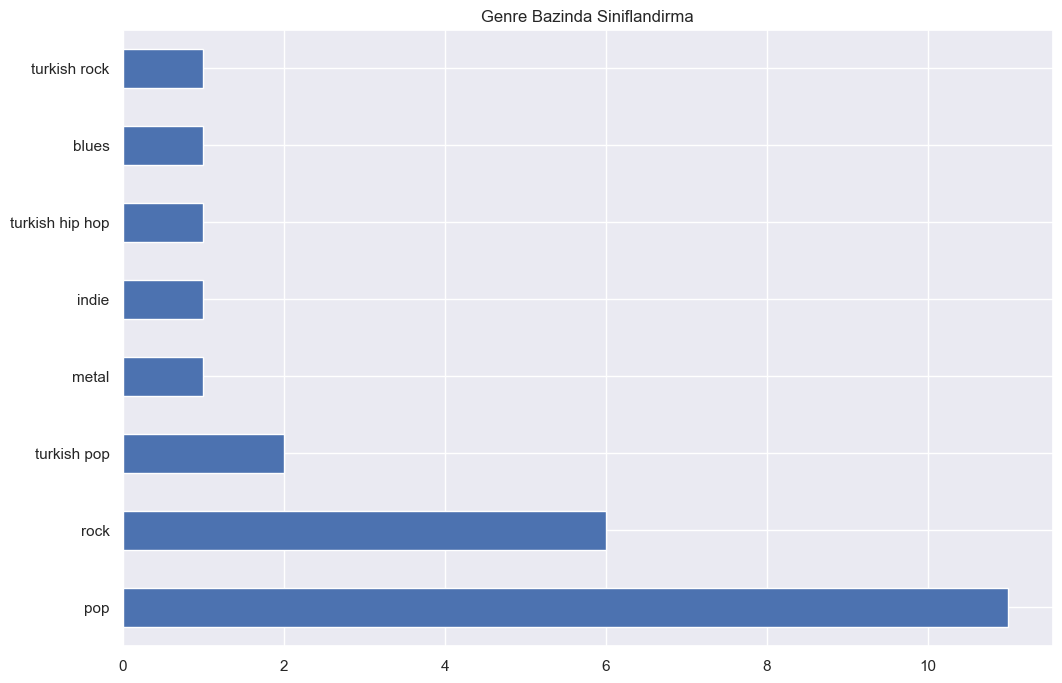

In [87]:
df["new_genre"].value_counts().plot(kind = "barh").set_title("Genre Bazinda Siniflandirma");